In [1]:
import glob
import pandas as pd
import wave
import librosa
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Vin Bigdata


In [2]:
list_all_vin=glob.glob("datasets/VinBigdata/*/*")
print('số người: ',len(glob.glob("datasets/VinBigdata/*")))
print('số instances: ',len(list_all_vin))

số người:  500
số instances:  5000


In [3]:
dic_region_vin={'MienNam':0,'MienBac':0,'MienTrung':0}
dic_gender_vin={'Nam':0,'Nu':0}
list_geo_vin=[]
list_age_vin=[]
list_sample_rate_vin=[]
list_duration_vin=[]
for x in list_all_vin:
    if 'MienNam' in x:
        dic_region_vin['MienNam']= dic_region_vin['MienNam']+1
    elif 'MienBac' in x:
        dic_region_vin['MienBac']= dic_region_vin['MienBac']+1
    elif 'MienTrung' in x:
        dic_region_vin['MienTrung']= dic_region_vin['MienTrung']+1
    if '-Nam-' in x or '-nam-' in x:
        dic_gender_vin['Nam']= dic_gender_vin['Nam']+1
    elif '-Nu-' in x or '-nu-' in x:
        dic_gender_vin['Nu']= dic_gender_vin['Nu']+1
    tmp=x.split('-')
    list_geo_vin.append(tmp[4])
    list_age_vin.append(tmp[6])
    list_sample_rate_vin.append(librosa.get_duration(filename=x))
    list_duration_vin.append(librosa.get_samplerate(path=x))
dic_geo_vin=pd.Series(list_geo_vin).value_counts().to_dict()
dic_age_vin=pd.Series(list_age_vin).value_counts().sort_index().to_dict()


In [4]:
print('Instances by region:',dic_region_vin,'\n')
print('Instances by gender:',dic_gender_vin,'\n')
print('Instances by province:',dic_geo_vin,'\n')
print('Instances by age:',dic_age_vin,'\n')

Instances by region: {'MienNam': 210, 'MienBac': 560, 'MienTrung': 4230} 

Instances by gender: {'Nam': 2520, 'Nu': 2480} 

Instances by province: {'PhuYen': 760, 'HaNoi': 430, 'GiaLai': 430, 'DaNang': 410, 'QuangNam': 350, 'DakLak': 330, 'QuangNgai': 310, 'BinhDinh': 250, 'HaTinh': 230, 'QuangTri': 190, 'ThuaThienHue': 180, 'NgheAn': 170, 'KonTum': 130, 'QuangBinh': 130, 'TPHoChiMinh': 120, 'KhanhHoa': 100, 'CanTho': 90, 'DakNong': 80, 'HaiPhong': 70, 'VinhPhuc': 70, 'ThanhHoa': 50, 'LamDong': 30, 'NamDinh': 30, 'BinhThuan': 20, 'BacGiang': 10, 'NinhBinh': 10, 'ThaiBinh': 10, 'HungYen': 10} 

Instances by age: {'1937': 10, '1940': 10, '1941': 20, '1942': 10, '1943': 10, '1944': 10, '1945': 40, '1946': 20, '1947': 40, '1948': 30, '1949': 30, '1950': 80, '1951': 10, '1952': 20, '1955': 20, '1956': 40, '1957': 20, '1958': 10, '1959': 30, '1960': 50, '1971': 10, '1972': 10, '1974': 10, '1975': 50, '1976': 10, '1980': 10, '1982': 20, '1983': 10, '1985': 20, '1986': 10, '1987': 30, '1989': 

(array([  24.,  736., 1725., 1200.,  588.,  356.,  192.,   70.,   45.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

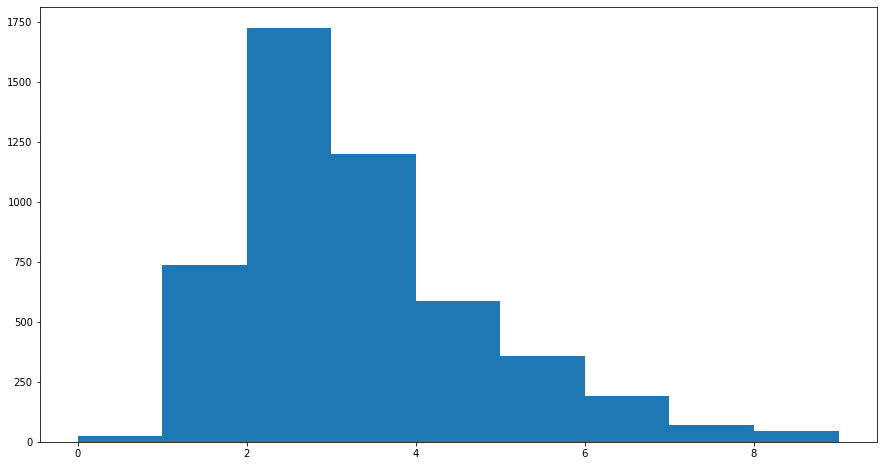

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_vin,bins=list(range(10)))

(array([   0.,    0.,    0.,    0.,    0., 5000.,    0.,    0.,    0.,
           0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

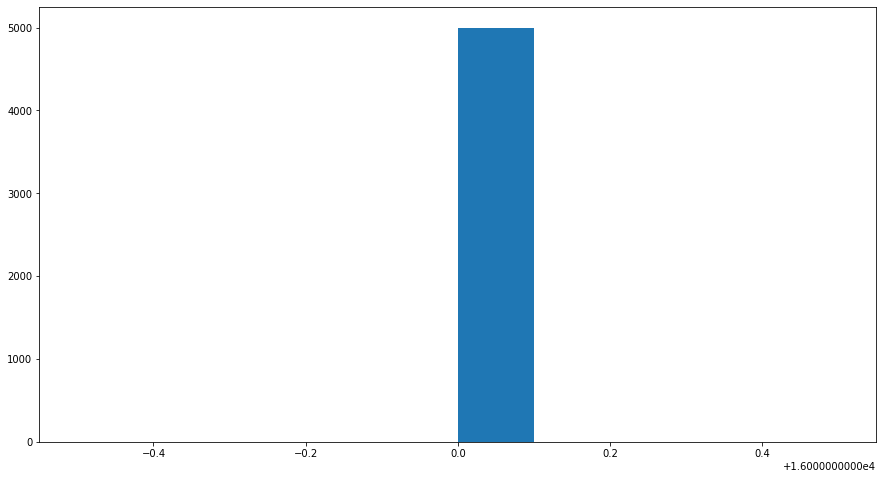

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_vin)

In [7]:
np.sum(list_duration_vin)

80000000

- Lệch nặng vùng miền chủ yếu miền trung
- sample rate chủ yếu 16000
- duration chủ yếu trong khoảng [2-4]s
- phân mảnh kém (các file bị cắt giữa từ)
- có tạp âm
- giới tính cân đối
- số người:  500
- số instances:  5000
- 80,000,000s âm thanh

# VCTK

In [8]:
list_all_vctk=glob.glob("datasets/VCTK-Corpus/wav48/*/*")
print('số người: ',len(glob.glob("datasets/VCTK-Corpus/wav48/*")))
print('số instances: ',len(list_all_vctk))

số người:  109
số instances:  44258


In [9]:
list_sample_rate_vctk=[]
list_duration_vctk=[]
for x in list_all_vctk:
    try:
        list_sample_rate_vctk.append(librosa.get_duration(filename=x))
        list_duration_vctk.append(librosa.get_samplerate(path=x))
    except:
        print(x)

datasets/VCTK-Corpus/wav48/p376/p376_295.raw


(array([5.000e+00, 5.000e+00, 8.100e+01, 1.476e+03, 5.768e+03, 9.325e+03,
        8.399e+03, 6.807e+03, 4.722e+03, 2.931e+03, 1.583e+03, 9.980e+02,
        5.910e+02, 4.120e+02, 2.980e+02, 2.510e+02, 1.670e+02, 1.130e+02,
        9.000e+01, 6.100e+01, 3.300e+01, 3.000e+01, 2.200e+01, 2.300e+01,
        1.100e+01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5]),
 <BarContainer object of 25 artists>)

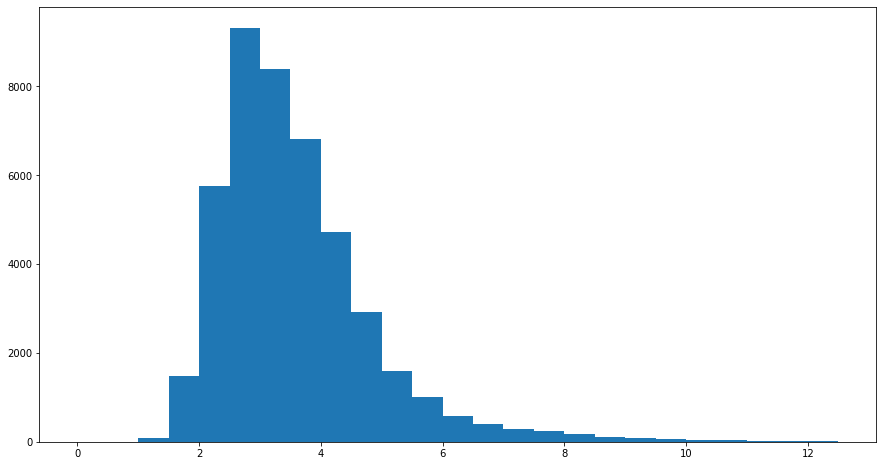

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_vctk,bins=np.array(list(range(0,26)))/2.0)

(array([    0.,     0.,     0.,     0.,     0., 44257.,     0.,     0.,
            0.,     0.]),
 array([47999.5, 47999.6, 47999.7, 47999.8, 47999.9, 48000. , 48000.1,
        48000.2, 48000.3, 48000.4, 48000.5]),
 <BarContainer object of 10 artists>)

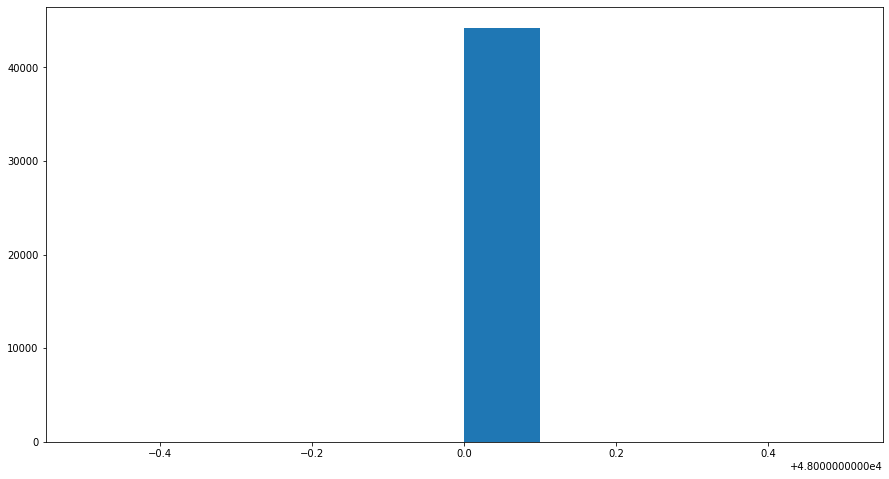

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_vctk)

In [12]:
np.sum(list_duration_vctk)/3600

590093.3333333334

- không có tạp âm
- độ dài chủ yếu tập trung từ [2.5;5]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 48000
- số người:  109
- số instances:  44258
- 590093h âm thanh
- có 1 file raw lỗi wav48/p376/p376_295.raw

# VoxCeleb1

## dev

In [13]:
list_all_voxceleb1_dev=glob.glob("datasets/VoxCeleb1/dev/wav/*/*/*")
print('số người: ',len(glob.glob("datasets/VoxCeleb1/dev/wav/*")))
print('số instances: ',len(list_all_voxceleb1_dev))

số người:  1211
số instances:  148642


In [14]:
list_sample_rate_voxceleb1_dev=[]
list_duration_voxceleb1_dev=[]
for x in list_all_voxceleb1_dev:
    try:
        list_sample_rate_voxceleb1_dev.append(librosa.get_duration(filename=x))
        list_duration_voxceleb1_dev.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([    0.,     0.,     0.,  1797., 36834., 25743., 18609., 13623.,
        10257.,  8091.,  6227.,  4764.,  3917.,  3107.,  2548.,  2075.,
         1692.,  1395.,  1097.,  1011.,   880.,   700.,   628.,   526.,
          404.,   377.,   315.,   257.,   233.,   177.,   169.,   146.,
          127.,   124.,   105.,    87.,    70.,    62.,    52.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

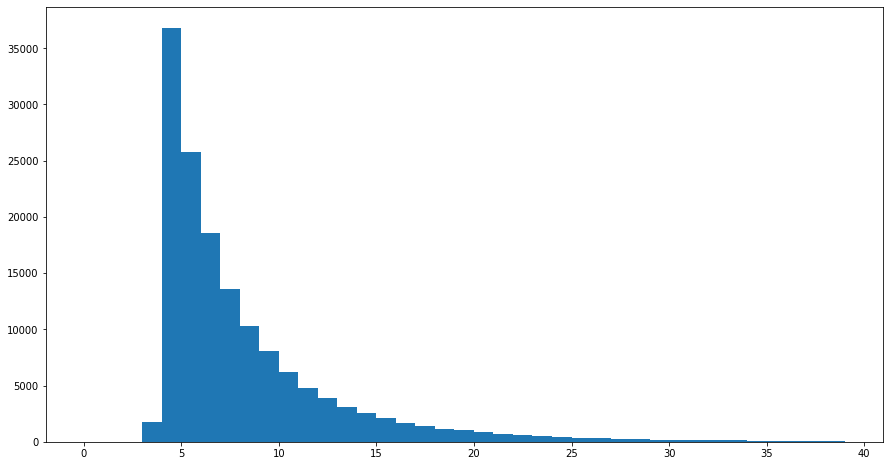

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_voxceleb1_dev,bins=list(range(40)))

(array([     0.,      0.,      0.,      0.,      0., 148642.,      0.,
             0.,      0.,      0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

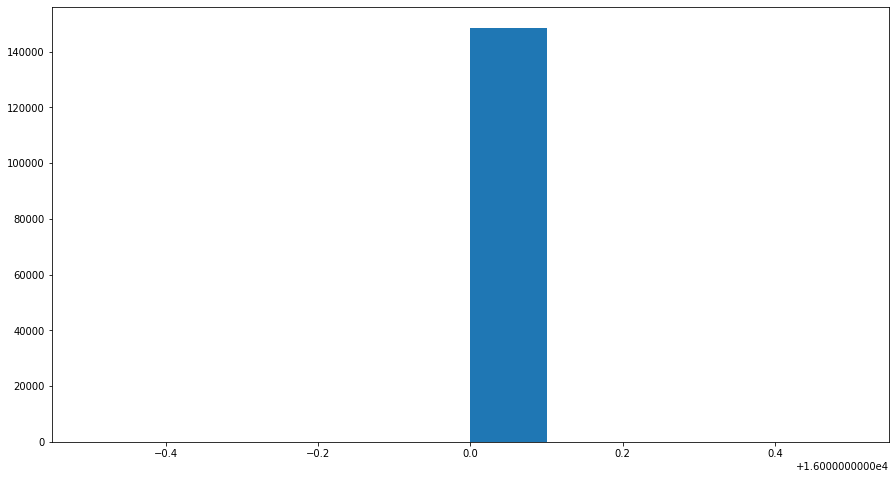

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_voxceleb1_dev)

In [17]:
np.sum(list_duration_voxceleb1_dev)/3600

660631.1111111111

- có tạp âm
- độ dài chủ yếu tập trung từ [5;10]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  1211
- số instances:  148642
- 660631h âm thanh

## test

In [18]:
list_all_voxceleb1_test=glob.glob("datasets/VoxCeleb1/test/wav/*/*/*")
print('số người: ',len(glob.glob("datasets/VoxCeleb1/test/wav/*")))
print('số instances: ',len(list_all_voxceleb1_test))

số người:  40
số instances:  4874


In [19]:
list_sample_rate_voxceleb1_test=[]
list_duration_voxceleb1_test=[]
for x in list_all_voxceleb1_test:
    try:
        list_sample_rate_voxceleb1_test.append(librosa.get_duration(filename=x))
        list_duration_voxceleb1_test.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([   0.,    0.,    0.,   75., 1241.,  816.,  597.,  490.,  311.,
         256.,  198.,  156.,  117.,  112.,   95.,   60.,   39.,   46.,
          39.,   30.,   23.,   29.,   19.,   15.,   14.,   10.,   11.,
           4.,    7.,    8.,    5.,    4.,    6.,    2.,    4.,    4.,
           0.,    2.,    4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

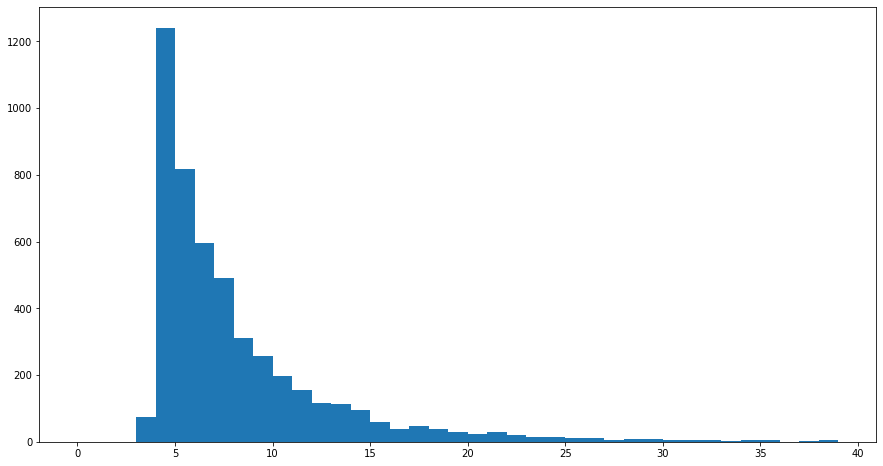

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_voxceleb1_test,bins=list(range(40)))

(array([   0.,    0.,    0.,    0.,    0., 4874.,    0.,    0.,    0.,
           0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

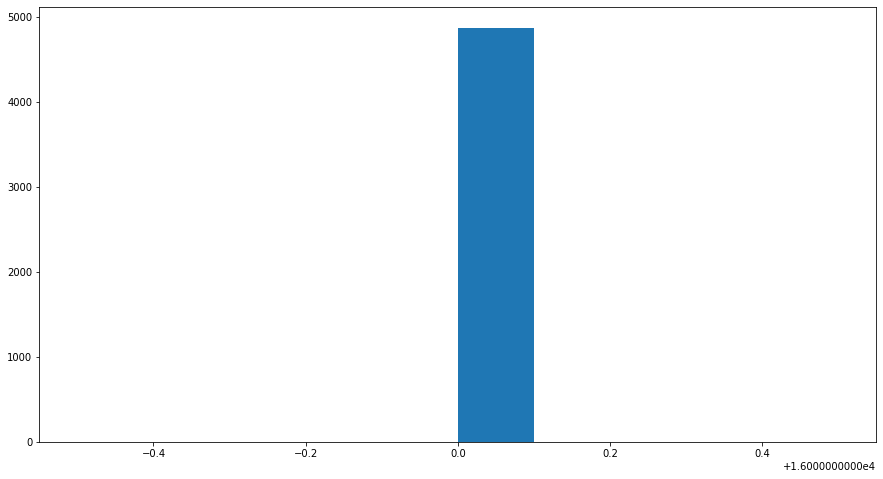

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_voxceleb1_test)

In [22]:
np.sum(list_duration_voxceleb1_test)/3600

21662.222222222223

- có tạp âm
- độ dài chủ yếu tập trung từ [5;10]s
- phân mảnh tốt
- sample rate 16000
- số người:  40
- số instances:  4874
- 21662h âm thanh

# VoxCeleb2

## dev

In [12]:
list_all_voxceleb2_dev=glob.glob("datasets/VoxCeleb2/dev/aac/*/*/*")
print('số người: ',len(glob.glob("datasets/VoxCeleb2/dev/aac/*")))
print('số instances: ',len(list_all_voxceleb2_dev))

số người:  5994
số instances:  1092009


In [13]:
list_sample_rate_voxceleb2_dev=[]
list_duration_voxceleb2_dev=[]
for x in list_all_voxceleb2_dev:
    try:
        list_sample_rate_voxceleb2_dev.append(librosa.get_duration(filename=x))
        list_duration_voxceleb2_dev.append(librosa.get_samplerate(path=x))
    except:
        print(x)

datasets/VoxCeleb2/dev/aac/id03313/mPSOjViSeY0/00372.wav


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 3.14870e+04, 3.05765e+05,
        1.92347e+05, 1.42258e+05, 9.23560e+04, 7.02070e+04, 5.40060e+04,
        3.77880e+04, 3.12010e+04, 2.34680e+04, 1.77320e+04, 1.56200e+04,
        1.16160e+04, 9.99000e+03, 8.43000e+03, 6.60000e+03, 5.90600e+03,
        4.80600e+03, 3.78700e+03, 3.43100e+03, 2.82200e+03, 2.50000e+03,
        2.21600e+03, 1.86300e+03, 1.61700e+03, 1.34000e+03, 1.11400e+03,
        1.06600e+03, 8.23000e+02, 8.39000e+02, 7.20000e+02, 6.17000e+02,
        5.83000e+02, 4.94000e+02, 4.18000e+02, 4.34000e+02]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

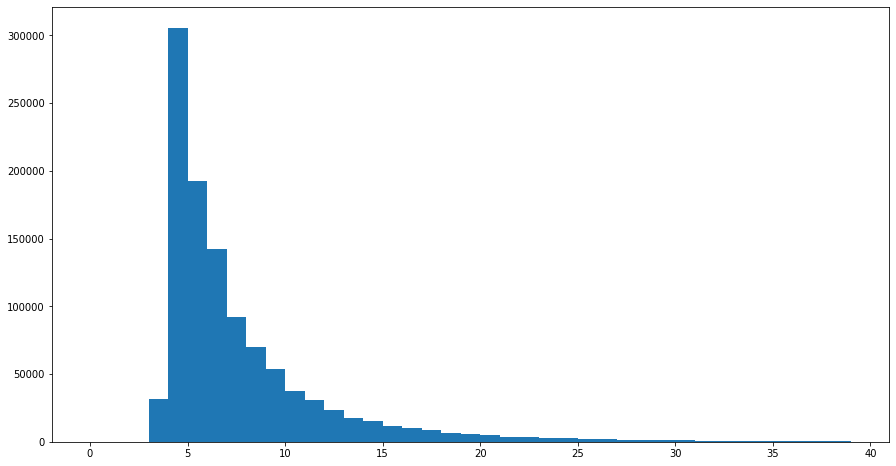

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_voxceleb2_dev,bins=list(range(40)))

(array([      0.,       0.,       0.,       0.,       0., 1092009.,
              0.,       0.,       0.,       0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

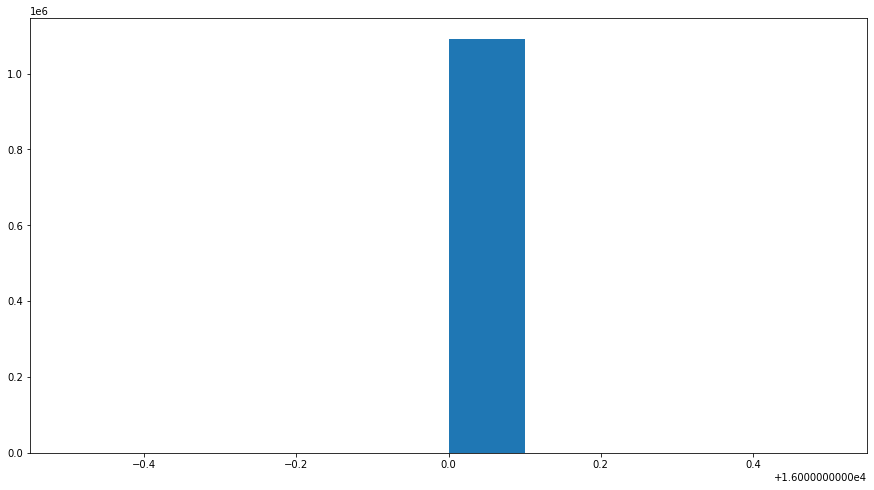

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_voxceleb2_dev)

In [6]:
np.sum(list_duration_voxceleb2_dev)/3600

4853373.333333333

- có tạp âm
- độ dài chủ yếu tập trung từ [5;10]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000 sau khi đã chuyển về định dạng file wav
- số người:  5994
- số instances:  1092009
- 4853373h âm thanh

## test

In [ ]:
list_all_voxceleb2_test=glob.glob("datasets/VoxCeleb2/aac/*/*/*")
print('số người: ',len(glob.glob("datasets/VoxCeleb2/aac/*")))
print('số instances: ',len(list_all_voxceleb2_test))

số người:  118
số instances:  36237


In [ ]:
list_sample_rate_voxceleb2_test=[]
list_duration_voxceleb2_test=[]
for x in list_all_voxceleb2_test:
    try:
        list_sample_rate_voxceleb2_test.append(librosa.get_duration(filename=x))
        list_duration_voxceleb2_test.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([   0.,    0.,    0., 1033., 9858., 6349., 4553., 3046., 2313.,
        1893., 1251., 1125.,  786.,  658.,  509.,  419.,  334.,  297.,
         247.,  232.,  209.,  157.,  142.,   95.,   94.,   81.,   59.,
          57.,   51.,   48.,   41.,   30.,   21.,   34.,   24.,   21.,
          14.,   19.,   17.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

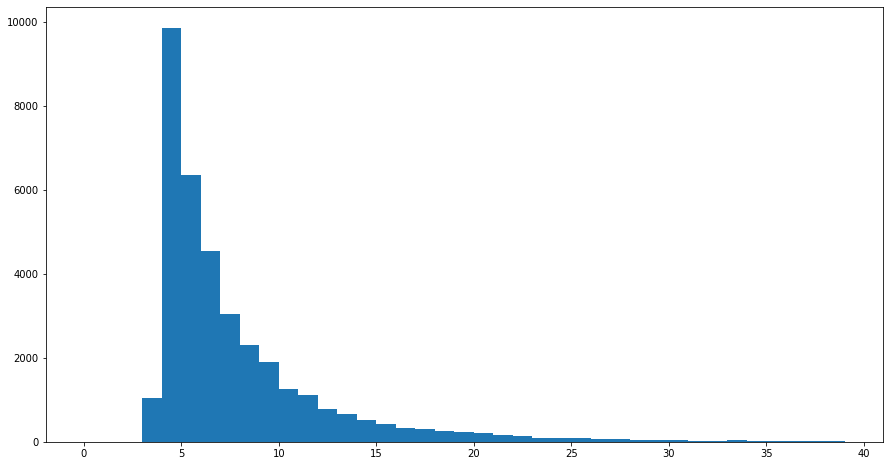

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_voxceleb2_test,bins=list(range(40)))

(array([    0.,     0.,     0.,     0.,     0., 36237.,     0.,     0.,
            0.,     0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

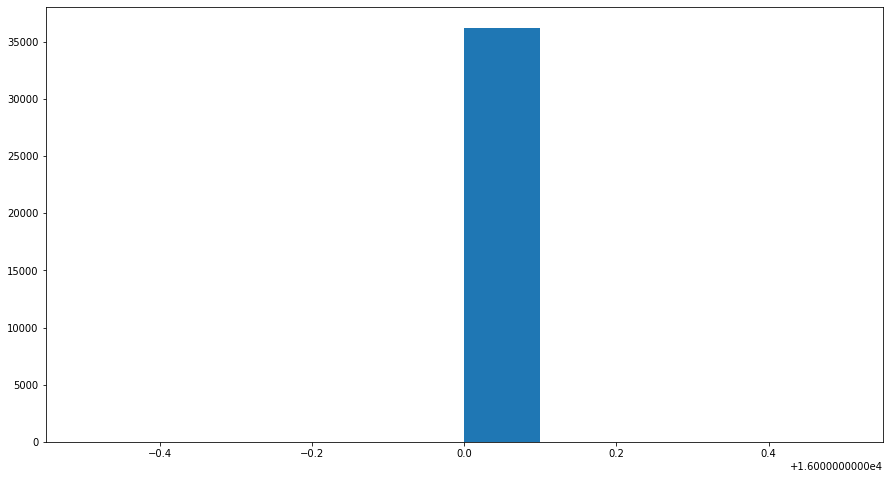

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_voxceleb2_test)

In [11]:
np.sum(list_duration_voxceleb2_test)/3600

161053.33333333334

- có tạp âm
- độ dài chủ yếu tập trung từ [5;10]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  118
- số instances:  36237
- 161053h âm thanh

# LibriSpeech

## dev-clean

In [14]:
list_all_librispeech_dev_clean=glob.glob("datasets/LibriSpeech/dev-clean/*/*/*")
for x in list_all_librispeech_dev_clean:
    if '.txt' in x:
        list_all_librispeech_dev_clean.remove(x)
print('số người: ',len(glob.glob("datasets/LibriSpeech/dev-clean/*")))
print('số instances: ',len(list_all_librispeech_dev_clean))


số người:  40
số instances:  2703


In [15]:
list_sample_rate_librispeech_dev_clean=[]
list_duration_librispeech_dev_clean=[]
for x in list_all_librispeech_dev_clean:
    try:
        list_sample_rate_librispeech_dev_clean.append(librosa.get_duration(filename=x))
        list_duration_librispeech_dev_clean.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([  0.,  37., 363., 363., 355., 250., 240., 204., 179., 144., 135.,
         91.,  54.,  49.,  49.,  44.,  33.,  26.,  12.,  14.,  17.,   4.,
          7.,   6.,   7.,   0.,   2.,   3.,   4.,   2.,   0.,   3.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

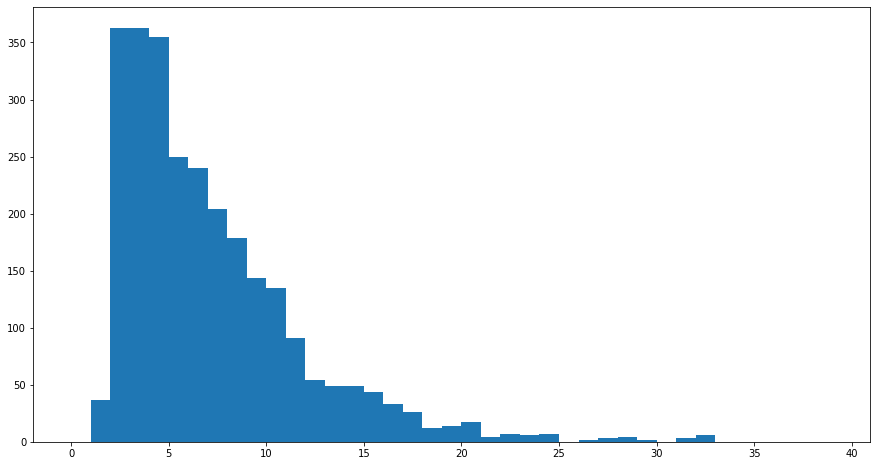

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_librispeech_dev_clean,bins=list(range(40)))

(array([   0.,    0.,    0.,    0.,    0., 2703.,    0.,    0.,    0.,
           0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

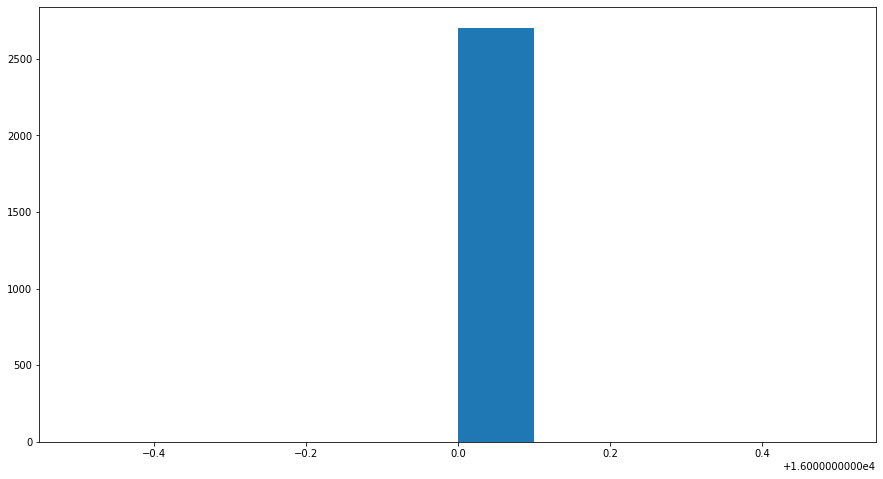

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_librispeech_dev_clean)

In [18]:
np.sum(list_duration_librispeech_dev_clean)/3600

12013.333333333334

- không có tạp âm
- độ dài chủ yếu tập trung từ [3;10]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  40
- số instances:  2703
- 12013h âm thanh

## test-clean

In [24]:
list_all_librispeech_test_clean=glob.glob("datasets/LibriSpeech/test-clean/*/*/*")
for x in list_all_librispeech_test_clean:
    if '.txt' in x:
        list_all_librispeech_test_clean.remove(x)
print('số người: ',len(glob.glob("datasets/LibriSpeech/test-clean/*")))
print('số instances: ',len(list_all_librispeech_test_clean))


số người:  40
số instances:  2620


In [20]:
list_sample_rate_librispeech_test_clean=[]
list_duration_librispeech_test_clean=[]
for x in list_all_librispeech_test_clean:
    try:
        list_sample_rate_librispeech_test_clean.append(librosa.get_duration(filename=x))
        list_duration_librispeech_test_clean.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([  0.,  36., 355., 379., 319., 268., 212., 192., 142., 103., 100.,
         83.,  73.,  60.,  59.,  42.,  43.,  29.,  14.,  19.,  27.,  12.,
         10.,   8.,   5.,   7.,   3.,   3.,   6.,   2.,   3.,   2.,   2.,
          1.,   1.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

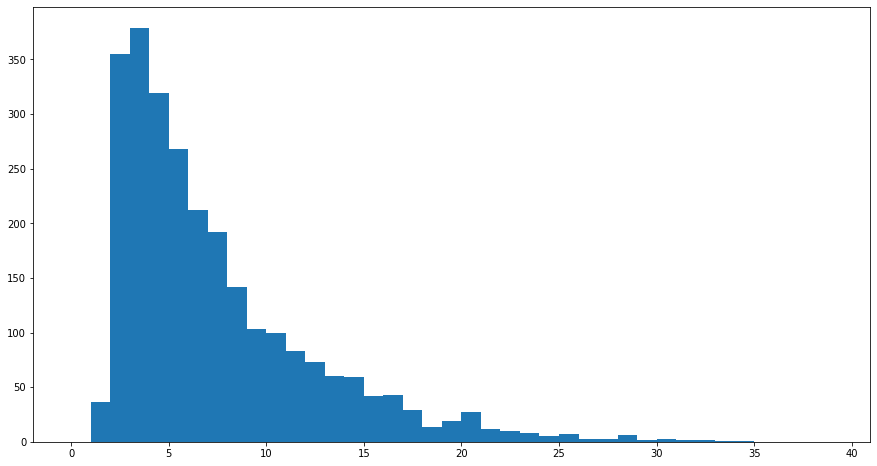

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_librispeech_test_clean,bins=list(range(40)))

(array([   0.,    0.,    0.,    0.,    0., 2620.,    0.,    0.,    0.,
           0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

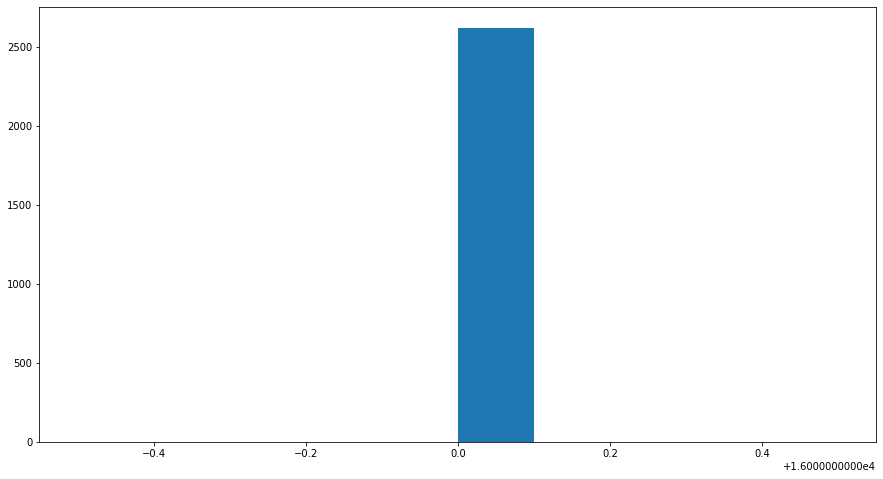

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_librispeech_test_clean)

In [23]:
np.sum(list_duration_librispeech_test_clean)/3600

11644.444444444445

- không có tạp âm
- độ dài chủ yếu tập trung từ [3;10]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  40
- số instances:  2620
- 11644h âm thanh

## train-clean-100

In [25]:
list_all_librispeech_train_clean_100=glob.glob("datasets/LibriSpeech/train-clean-100/*/*/*")
for x in list_all_librispeech_train_clean_100:
    if '.txt' in x:
        list_all_librispeech_train_clean_100.remove(x)
print('số người: ',len(glob.glob("datasets/LibriSpeech/train-clean-100/*")))
print('số instances: ',len(list_all_librispeech_train_clean_100))


số người:  251
số instances:  28539


In [26]:
list_sample_rate_librispeech_train_clean_100=[]
list_duration_librispeech_train_clean_100=[]
for x in list_all_librispeech_train_clean_100:
    try:
        list_sample_rate_librispeech_train_clean_100.append(librosa.get_duration(filename=x))
        list_duration_librispeech_train_clean_100.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([0.000e+00, 2.400e+01, 5.630e+02, 6.830e+02, 6.700e+02, 6.200e+02,
        6.360e+02, 6.610e+02, 7.220e+02, 7.850e+02, 9.750e+02, 1.379e+03,
        2.491e+03, 4.074e+03, 6.012e+03, 6.428e+03, 1.763e+03, 4.900e+01,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

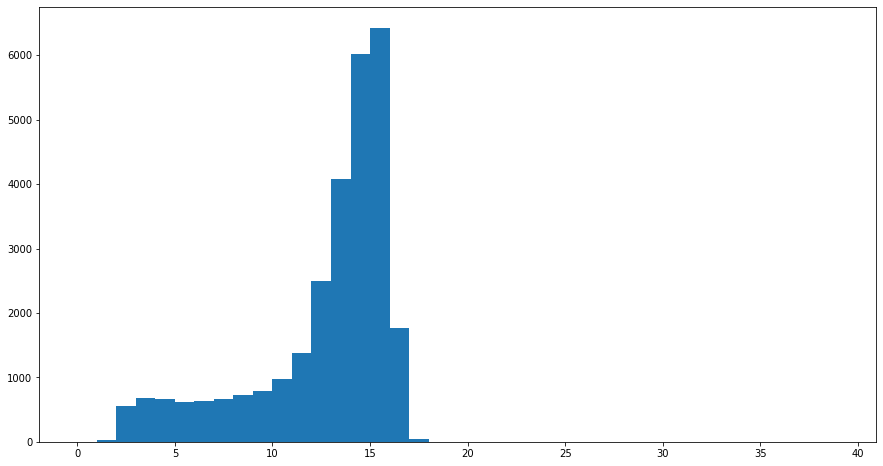

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_librispeech_train_clean_100,bins=list(range(40)))

(array([    0.,     0.,     0.,     0.,     0., 28539.,     0.,     0.,
            0.,     0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

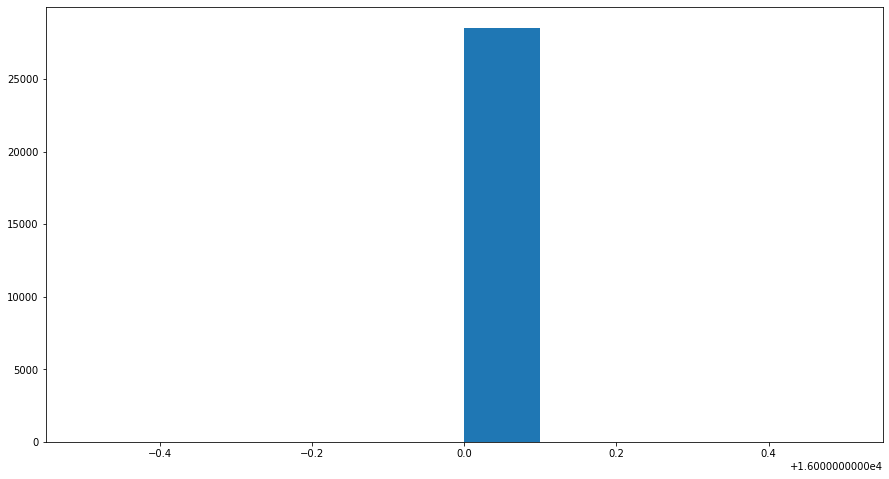

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_librispeech_train_clean_100)

In [29]:
np.sum(list_duration_librispeech_train_clean_100)/3600

126840.0

- không có tạp âm
- độ dài chủ yếu tập trung từ [10;15]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  251
- số instances:  28539
- 126840h âm thanh

## train-clean-360

In [30]:
list_all_librispeech_train_clean_360=glob.glob("datasets/LibriSpeech/train-clean-360/*/*/*")
for x in list_all_librispeech_train_clean_360:
    if '.txt' in x:
        list_all_librispeech_train_clean_360.remove(x)
print('số người: ',len(glob.glob("datasets/LibriSpeech/train-clean-360/*")))
print('số instances: ',len(list_all_librispeech_train_clean_360))


số người:  921
số instances:  104014


In [31]:
list_sample_rate_librispeech_train_clean_360=[]
list_duration_librispeech_train_clean_360=[]
for x in list_all_librispeech_train_clean_360:
    try:
        list_sample_rate_librispeech_train_clean_360.append(librosa.get_duration(filename=x))
        list_duration_librispeech_train_clean_360.append(librosa.get_samplerate(path=x))
    except:
        print(x)

(array([0.0000e+00, 2.1600e+02, 2.0820e+03, 2.4290e+03, 2.5330e+03,
        2.6030e+03, 2.5150e+03, 2.5030e+03, 2.6760e+03, 2.9690e+03,
        3.7620e+03, 5.3480e+03, 8.8840e+03, 1.4717e+04, 2.1417e+04,
        2.3017e+04, 6.1570e+03, 1.5300e+02, 5.0000e+00, 1.1000e+01,
        7.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <BarContainer object of 39 artists>)

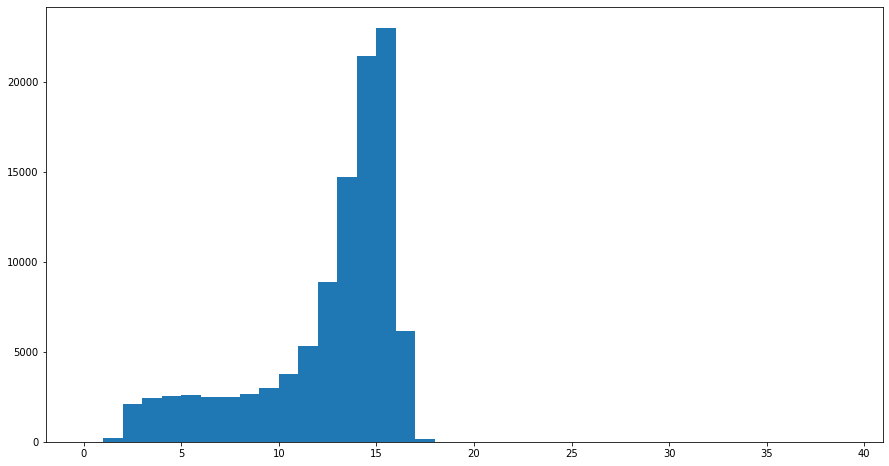

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_sample_rate_librispeech_train_clean_360,bins=list(range(40)))

(array([     0.,      0.,      0.,      0.,      0., 104014.,      0.,
             0.,      0.,      0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

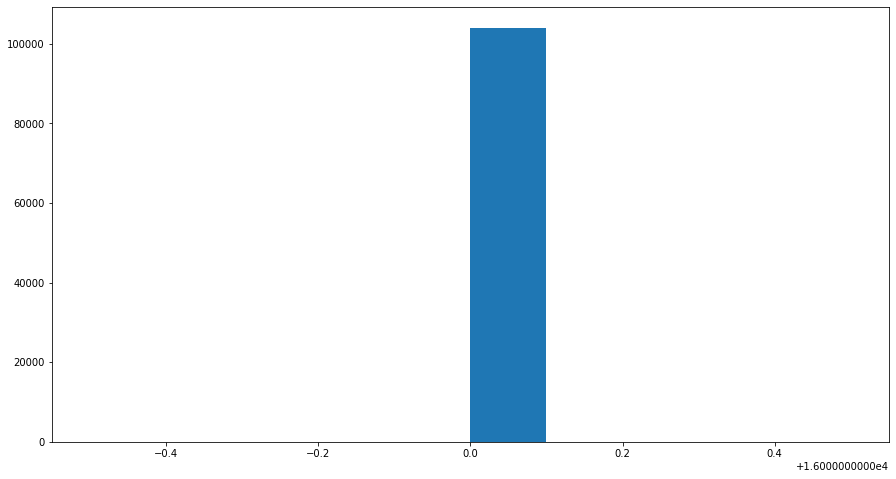

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(list_duration_librispeech_train_clean_360)

In [34]:
np.sum(list_duration_librispeech_train_clean_360)/3600

462284.44444444444

- không có tạp âm
- độ dài chủ yếu tập trung từ [10;15]s
- chất lượng recording cao
- phân mảnh tốt
- sample rate 16000
- số người:  921
- số instances:  104014
- 462284h âm thanh